In [13]:
import numpy as np
import soundfile as sf
import librosa
import librosa.display
import random
import matplotlib.pyplot as plt

In [14]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2, figsize=(10, 6))
    t = librosa.times_like(signal, sr=sr)

    ax[0].plot(t, signal)
    ax[0].set(title="Original Signal", xlabel="Time (s)", ylabel="Amplitude")

    ax[1].plot(t, augmented_signal)
    ax[1].set(title="Augmented Signal", xlabel="Time (s)", ylabel="Amplitude")

    plt.tight_layout()
    plt.show()

In [15]:
#adding white noise
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [16]:
def random_gain(signal, min_gain_factor, max_gain_factor):
    gain_factor = random.uniform(min_gain_factor, max_gain_factor)
    return signal * gain_factor

In [18]:
def pitch_scale(signal, sr, num_semitones):
    n_steps = num_semitones
    return librosa.effects.pitch_shift(signal, sr=sr, n_steps=n_steps)

In [22]:
def time_stretch(signal, rate):
    return librosa.effects.time_stretch(signal, rate=rate)

In [25]:
def invert_polarity(signal, sr):
    return signal * -1

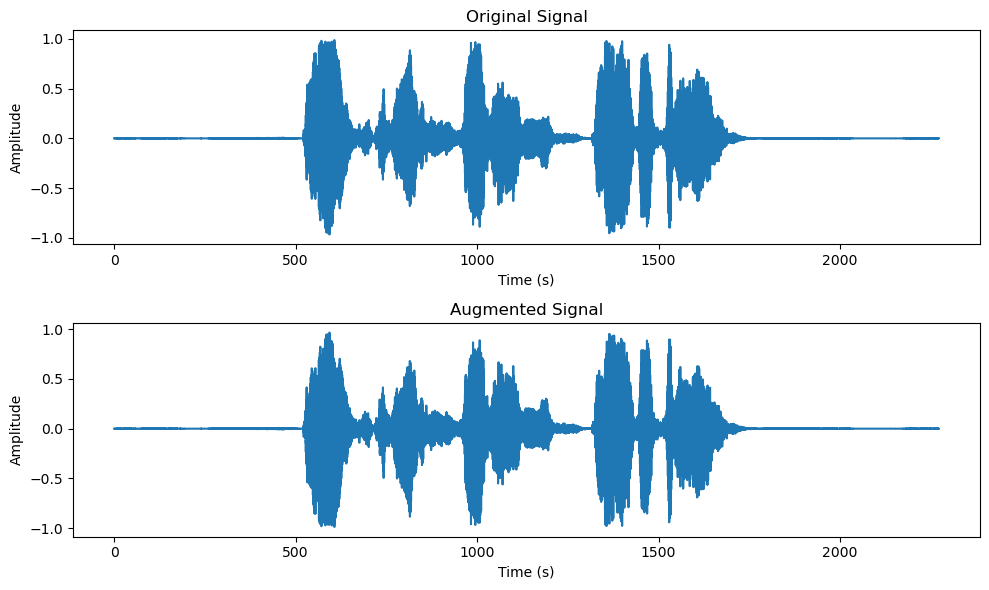

In [29]:
if __name__ == "__main__":
    signal, sr = librosa.load('/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-02-02-01.wav')
    #augmented_signal = add_white_noise(signal, 0.1)
    #augmented_signal = random_gain(signal, 2, 4)
    #augmented_signal = pitch_scale(signal, sr=sr, num_semitones=2)
    #augmented_signal = time_stretch(signal, rate=0.5)
    augmented_signal = invert_polarity(signal, sr)
    sf.write("time_stretch.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)